## Exploratory Data Analysis

### Load dataset

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('/Users/kelly/Desktop/github-fun-projects/city-of-new-york-air-quality-measurement/data/air_quality_data.csv')

# Display the first 5 rows of the dataset
print(data.head())


   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   
3     178561           365                Fine particles (PM 2.5)   
4     823217           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   
3            Mean       mcg/m3         UHF42        409.0   
4            Mean       mcg/m3         UHF42        409.0   

            Geo Place Name          Time Period  Start_Date  Data Value  \
0         Southeast Queens                 2015  01/01/2015         0.3   
1  Bensonhurst - Bay Ridge                 2015  01/01/2015         

### Examination of Basic Structure and Summary Statistics

In [2]:
# Display basic information about the dataset
print("info", data.info())

# Display summary statistics of the dataset
print("summary stats", data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB
info None
summary stats            Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830

### Check for Missing Values

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64


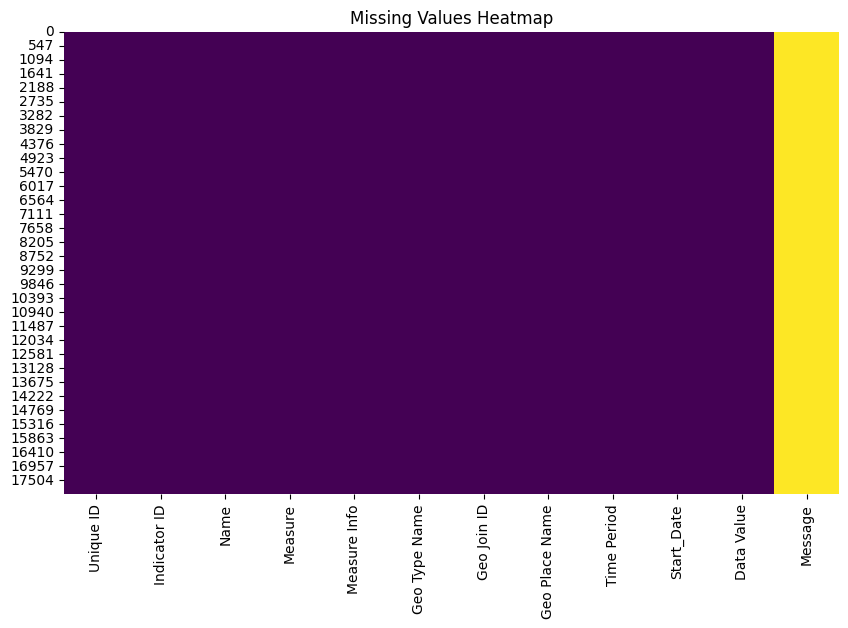

In [3]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


#### Drop Unnecesary Cloumns

In [4]:
data = data.drop(columns=['Message'])


#### Handle missing values

In [5]:
data = data.dropna(subset=['Geo Join ID', 'Geo Place Name'])

### Examination of Geo Locations

In [6]:
df = pd.DataFrame(data)

# Get unique values in the 'Measure Info' column
geo_unique_values = df['Geo Place Name'].unique()

# Print the unique values
print(geo_unique_values)

['Southeast Queens' 'Bensonhurst - Bay Ridge' 'Rockaways'
 'Coney Island - Sheepshead Bay' 'Williamsburg - Bushwick'
 'Bayside - Little Neck' 'Pelham - Throgs Neck' 'Upper West Side'
 'East New York' 'Canarsie - Flatlands' 'Jamaica'
 'Gramercy Park - Murray Hill' 'Hunts Point - Mott Haven'
 'Southwest Queens' 'Greenwich Village - SoHo' 'Brooklyn'
 'Downtown - Heights - Slope' 'Washington Heights' 'Northeast Bronx'
 'Greenpoint' 'Long Island City - Astoria' 'Port Richmond'
 'Kingsbridge - Riverdale' 'Throgs Neck and Co-op City (CD10)'
 'Williamsbridge and Baychester (CD12)' 'Jamaica and Hollis (CD12)'
 'South Ozone Park and Howard Beach (CD10)'
 'Kingsbridge Heights and Bedford (CD7)' 'Sunset Park (CD7)'
 'Rockaway and Broad Channel (CD14)' 'Upper West Side (CD7)'
 'Flushing and Whitestone (CD7)' 'Bushwick (CD4)'
 'Bedford Stuyvesant (CD3)' 'Jackson Heights (CD3)'
 'East Flatbush - Flatbush' 'Elmhurst and Corona (CD4)'
 'Highbridge and Concourse (CD4)' 'Lower East Side and Chinatown (CD

In [7]:
# show full response of geo place name counts
pd.set_option('display.max_rows', None) 
print(df['Geo Place Name'].value_counts())

Geo Place Name
Southeast Queens                                  269
Downtown - Heights - Slope                        269
Bedford Stuyvesant - Crown Heights                269
East Flatbush - Flatbush                          269
Flushing - Clearview                              269
East Harlem                                       269
Fordham - Bronx Pk                                269
Central Harlem - Morningside Heights              269
Bensonhurst - Bay Ridge                           269
West Queens                                       269
Sunset Park                                       269
Kingsbridge - Riverdale                           269
Borough Park                                      269
Greenpoint                                        269
Northeast Bronx                                   269
Washington Heights                                269
Long Island City - Astoria                        269
East New York                                     269
Pelham - Thro

In [8]:
# print how many unique locations
unique_locations = data['Geo Place Name'].nunique()
print(unique_locations)

114


### Examination of Time Period Values

In [9]:
# Check unique values and their counts in the 'Time Period' column
time_period_counts = data['Time Period'].value_counts()
print(time_period_counts)

# Check for unique values and potential issues
unique_time_periods = data['Time Period'].unique()
print(unique_time_periods)


Time Period
2017-2019                          480
2005-2007                          480
2012-2014                          480
2015-2017                          480
2009-2011                          480
Summer 2014                        423
Summer 2018                        423
Summer 2020                        423
Summer 2017                        423
Summer 2019                        423
Summer 2010                        423
Summer 2015                        423
Summer 2022                        423
Summer 2012                        423
Summer 2009                        423
Summer 2011                        423
Summer 2013                        423
Summer 2016                        423
Summer 2021                        423
2005                               417
2010                               321
2019                               321
Winter 2017-18                     282
Winter 2008-09                     282
Annual Average 2022                282
Annual Averag

In [10]:
# Get unique values in the 'Measure Info' column
unique_values = df['Measure Info'].value_counts()

# Print the unique values
print(unique_values)

Measure Info
ppb                     8037
mcg/m3                  5922
per 100,000 adults      1440
per square mile          963
per 100,000 children     720
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64


## Heatmap analysis of Data Distribution

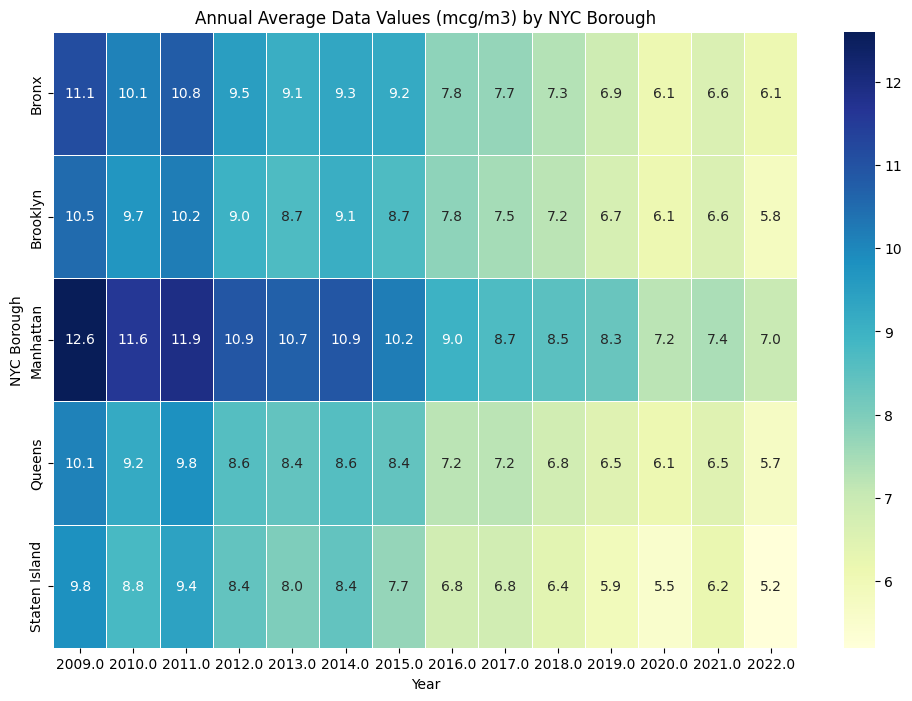

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of NYC boroughs
nyc_boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

# Filter data for 'Annual Average' only
annual_avg_data = data[data['Time Period'].str.contains('Annual Average', na=False)]

# Filter data for only NYC boroughs
annual_avg_data = annual_avg_data[annual_avg_data['Geo Place Name'].isin(nyc_boroughs)]

# Extract year from the 'Time Period' for the heatmap columns
annual_avg_data['Year'] = annual_avg_data['Time Period'].str.extract(r'(\d{4})').astype(float)

# Filter data for mcg/m3 and Âµg/m3 since they are one in the same
air_quality_data = annual_avg_data[(annual_avg_data['Measure Info'] == 'mcg/m3') | (annual_avg_data['Measure Info'] == 'Âµg/m3')]

# Pivot the filtered data
heatmap_data = air_quality_data.pivot_table(
    index='Geo Place Name',
    columns='Year',
    values='Data Value',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Annual Average Data Values (mcg/m3) by NYC Borough')
plt.xlabel('Year')
plt.ylabel('NYC Borough')
plt.show()


In [12]:
# Filter data for mcg/m3, Âµg/m3, and Annual Average
air_quality_data = data[(data['Measure Info'] == 'mcg/m3') | (data['Measure Info'] == 'µg/m3')]
annual_avg_data = air_quality_data[air_quality_data['Time Period'].str.contains('Annual Average')]

# Filter data for specified boroughs
borough_data = annual_avg_data[annual_avg_data['Geo Place Name'].isin(nyc_boroughs)]

# Calculate mean annual average mcg/m3 for each borough
mean_annual_avg_by_borough = borough_data.groupby('Geo Place Name')['Data Value'].mean()

# Filter for the desired boroughs
borough_averages = mean_annual_avg_by_borough[nyc_boroughs]

print(borough_averages)

Geo Place Name
Bronx            8.400000
Brooklyn         8.114286
Manhattan        9.635714
Queens           7.792857
Staten Island    7.378571
Name: Data Value, dtype: float64


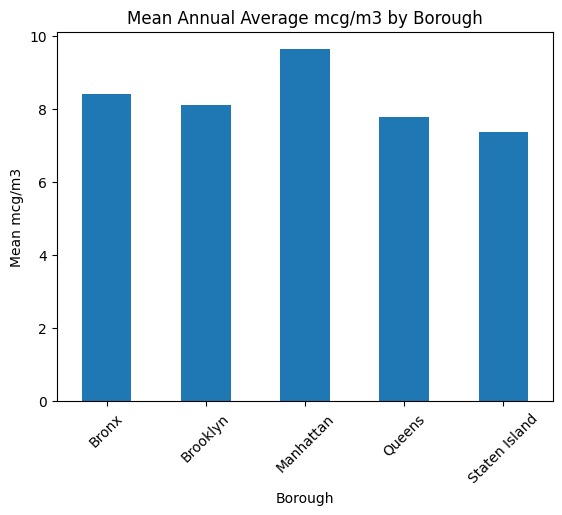

In [13]:
# Create a bar chart
borough_averages.plot(kind='bar')
plt.title('Mean Annual Average mcg/m3 by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean mcg/m3')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()